# Correlation of TF expression with binding

We have a list of TF archetypes that are enriched with human specific trans-affected regulatory elements. We want to identify candidate TFs that are responsible for the differential activity in trans so we will perform a correlation analysis where we take the differential expression of TFs that make up the achretypes and see if any correlate with differential binding. 

In other words, plot log2(odd ratio) as a value of enrichment for the TF footprints against the log2(GM/LCL) expression values. 

## human-skewed

### trans only

In [1]:
#r kernel
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(magrittr))
ini <- ini::read.ini("../config.ini")

In [13]:
fp_res <- read_tsv(ini$TF_FOOTPRINTING_JASPAR_GM12878$fp_shuf_or, show_col_types = FALSE) %>% 
    filter(sid == "HH-active_MM-inactive_trans-only") %>% rename("tested" = sid)

In [5]:
#read in diff expression
diff_expression <- read_tsv("../../data/RNA-seq/TFs-only_diff_expression_res_gene-symbols.tsv", show_col_types = FALSE)

head(diff_expression)

gene_symbol,ENSEMBL,baseMean,log2FoldChange,lfcSE,pvalue,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADNP,ENSG00000101126,5629.855710,-0.5146161,0.06835355,4.448834e-14,2.417508e-13
ADNP2,ENSG00000101544,123.899723,0.4675264,0.24434095,4.879199e-02,7.731433e-02
AEBP1,ENSG00000106624,2.892439,-0.1077634,0.87439984,8.120623e-01,8.510866e-01
AEBP2,ENSG00000139154,1900.262281,-0.1088252,0.09286712,2.383493e-01,3.122945e-01
AHCTF1,ENSG00000153207,15.625232,-0.7606129,0.61321783,1.293900e-01,1.843327e-01
AHDC1,ENSG00000126705,462.715633,1.2231739,0.15039911,1.913067e-16,1.189783e-15


In [14]:
# left join with TFs_trans, select, rename, and modify 
# cols to specify which is binding/expression and flip the diff expression sign
# so positive reflects more expressed in human cells

fp_res %<>% left_join(diff_expression, by = c("TF" = "gene_symbol")) %>%
    dplyr::transmute(region_type = tested, motif = TF, 
                     enrichment_log2OR = OR_log2, enrichment_qval = FDR_P, 
                     log2_expression = -log2FoldChange, expression_padj = padj) %>% drop_na()

nrow(fp_res)

[1] 386

In [15]:
#filter for trans only
fp_res_text <- dplyr::filter(fp_res, enrichment_log2OR > 1.5 & 
                                            enrichment_qval < 1e-10 & 
                                            expression_padj < 1e-50 &
                                            log2_expression > 0)

p <- ggplot(fp_res, aes(x = log2_expression, y = -log10(enrichment_qval))) +
    geom_point(shape = 21, aes(size = enrichment_log2OR, fill = -log10(expression_padj)), color = "grey") +
    ggrepel::geom_text_repel(data = fp_res_text, aes(label = motif), size = 5, fontface = "bold", color = "black",  
                             max.overlaps = getOption("ggrepel.max.overlaps", default = 100)) +
    geom_hline(yintercept = 0, color = "black", linetype = "dashed") +
    geom_vline(xintercept = 0, color = "black", linetype = "dashed") +
    viridis::scale_fill_viridis(option = "magma", direction = -1) +
    scale_size_area(max_size = 4) +
    theme_bw(base_size = 14) +
    theme(legend.position = "right") 

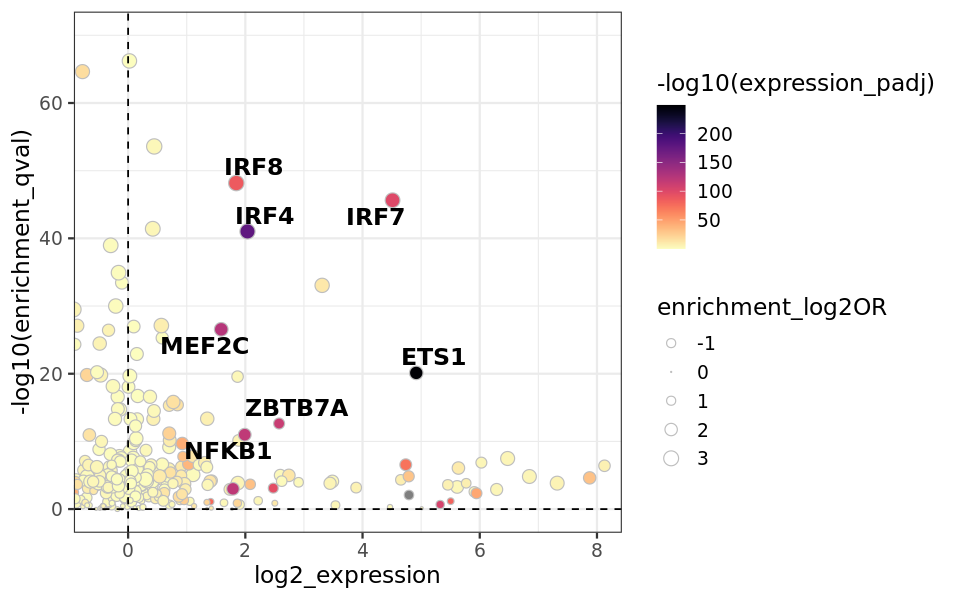

In [16]:
options(repr.plot.width = 8, repr.plot.height = 5)
p2 <- p + coord_cartesian(xlim = c(-0.5, 8), ylim = c(0, 70))
p2

In [17]:
fp_res_text$motif

[1] "ZBTB7A" "IRF4"   "IRF8"   "MEF2C"  "NFKB1"  "IRF7"   "ETS1"

In [18]:
ggsave(p2, filename = paste0(ini$TF_FOOTPRINTING_ARCH$plots, "/footprint_enrichment_vs_diff-expression_trans_only_hu.pdf"), device = cairo_pdf, height = 5, width = 8)

## macaque-skewed

### trans only

In [1]:
#r kernel
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(magrittr))
ini <- ini::read.ini("../config.ini")

In [19]:
fp_res <- read_tsv(ini$TF_FOOTPRINTING_JASPAR_LCL8664$fp_shuf_or, show_col_types = FALSE) %>% 
    filter(sid %in% c("MM-active_HH-inactive_trans-only"))

In [3]:
#read in diff expression
diff_expression <- read_tsv("../../data/RNA-seq/TFs-only_diff_expression_res_gene-symbols.tsv", show_col_types = FALSE)

head(diff_expression)

gene_symbol,ENSEMBL,baseMean,log2FoldChange,lfcSE,pvalue,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADNP,ENSG00000101126,5629.855710,-0.5146161,0.06835355,4.448834e-14,2.417508e-13
ADNP2,ENSG00000101544,123.899723,0.4675264,0.24434095,4.879199e-02,7.731433e-02
AEBP1,ENSG00000106624,2.892439,-0.1077634,0.87439984,8.120623e-01,8.510866e-01
AEBP2,ENSG00000139154,1900.262281,-0.1088252,0.09286712,2.383493e-01,3.122945e-01
AHCTF1,ENSG00000153207,15.625232,-0.7606129,0.61321783,1.293900e-01,1.843327e-01
AHDC1,ENSG00000126705,462.715633,1.2231739,0.15039911,1.913067e-16,1.189783e-15


In [20]:
# left join with TFs_trans, select, rename, and modify 
# cols to specify which is binding/expression and flip the diff expression sign
# so positive reflects more expressed in human cells

fp_res %<>% left_join(diff_expression, by = c("TF" = "gene_symbol")) %>%
    dplyr::transmute(region_type = sid, motif = TF, 
                     enrichment_log2OR = OR_log2, enrichment_qval = FDR_P, 
                     log2_expression = -log2FoldChange, expression_padj = padj) %>% drop_na()

nrow(fp_res)

[1] 386

In [22]:
#filter for trans only
fp_res_text <- fp_res_text <- dplyr::filter(fp_res, enrichment_log2OR > 0 & 
                                            enrichment_qval < 1e-10 & 
                                            expression_padj < 1e-20 &
                                            log2_expression < 0)

p <- ggplot(fp_res, aes(x = log2_expression, y = -log10(enrichment_qval))) +
    geom_point(shape = 21, aes(size = enrichment_log2OR, fill = -log10(expression_padj)), color = "grey") +
    ggrepel::geom_text_repel(data = fp_res_text, aes(label = motif), size = 5, fontface = "bold", color = "black",  
                             max.overlaps = getOption("ggrepel.max.overlaps", default = 100)) +
    geom_hline(yintercept = 0, color = "black", linetype = "dashed") +
    geom_vline(xintercept = 0, color = "black", linetype = "dashed") +
    viridis::scale_fill_viridis(option = "magma", direction = -1) +
    scale_size_area(max_size = 4) +
    theme_bw(base_size = 14) +
    theme(legend.position = "right") 

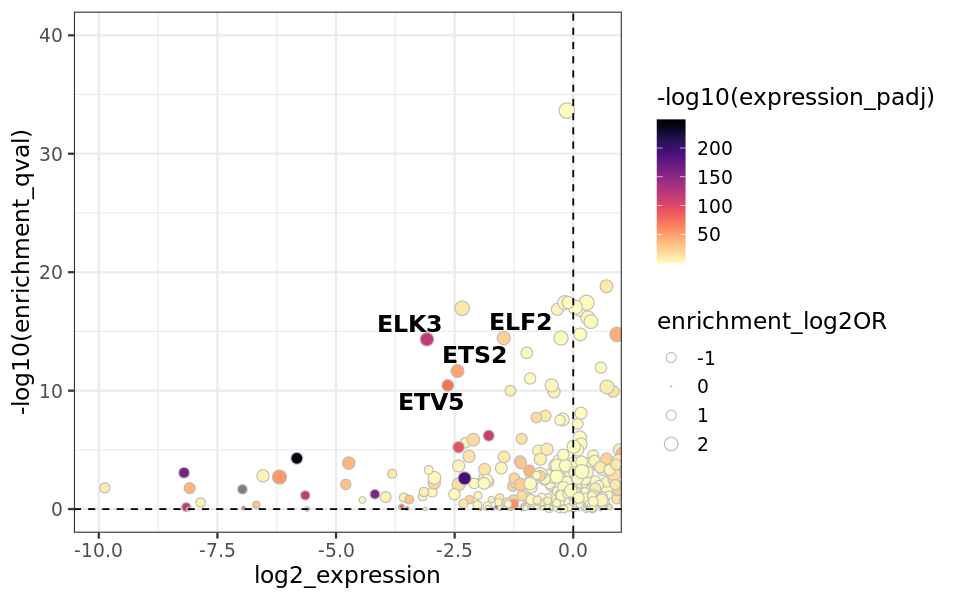

In [23]:
options(repr.plot.width = 8, repr.plot.height = 5)
p2 <- p + coord_cartesian(xlim = c(-10, 0.5), ylim = c(0, 40))
p2

In [24]:
fp_res_text$motif

[1] "ELK3" "ELF2" "ETS2" "ETV5"

In [25]:
ggsave(p2, filename = paste0(ini$TF_FOOTPRINTING_ARCH$plots, "/footprint_enrichment_vs_diff-expression_trans_only_ma.pdf"), device = cairo_pdf, height = 5, width = 8)

### TF FP barchart

In [53]:
df <- fp_res %>% filter(motif %in% as.vector(fp_res_text$motif)) %>% transmute(motif, "overlap" = a, "non_overlap" = b)

In [54]:
df %<>% add_row(motif = "total", overlap = sum(df$overlap), non_overlap = 93+1163)
df %<>% mutate(proportion = overlap/(overlap+non_overlap))

In [55]:
df %>% arrange(proportion)

motif,overlap,non_overlap,proportion
<chr>,<dbl>,<dbl>,<dbl>
HOXB6,10,1246,0.007961783
SMAD3,16,1240,0.012738854
LEF1,39,1217,0.031050955
PRDM1,81,1175,0.064490446
ELK3,93,1163,0.074044586
ETV5,123,1133,0.097929936
total,362,1256,0.223733004


In [56]:
df$motif %<>% factor(levels = c("total", "HOXB6", "SMAD3", "LEF1", "PRDM1", "ELK3", "ETV5"))

In [57]:
df$proportion <- signif(df$proportion, digits = 3) *100

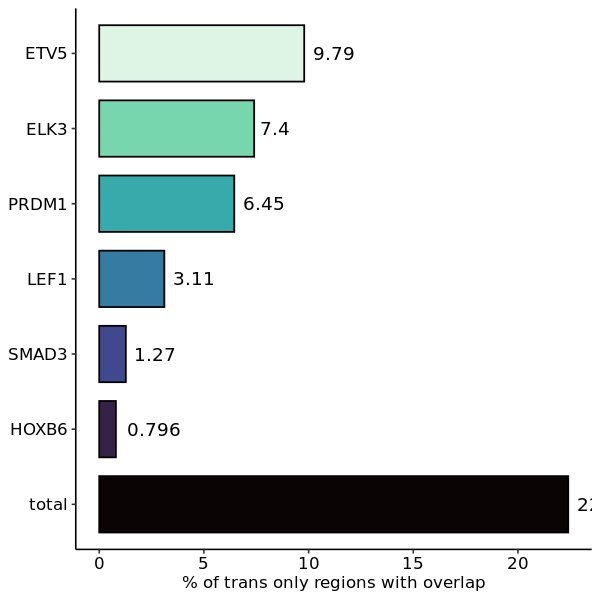

In [58]:
p <- ggplot(df, aes(y = motif, x = proportion, fill = motif)) +
    geom_col(color = "black", width = 0.75) +
    geom_text(aes(label = proportion), hjust = -0.2) +
    labs(x = "% of trans only regions with overlap") +
    scale_fill_viridis_d(option = "mako") + 
    theme_classic(base_size = 10) +
    theme(legend.position = "none", axis.title.y = element_blank(), 
          axis.text.y = element_text(size = 10, colour = "black"), 
          axis.text.x = element_text(size = 10, colour = "black"))
options(repr.plot.width = 5, repr.plot.height = 5)
p

In [59]:
ggsave(p, filename = paste0(ini$TF_FOOTPRINTING_ARCH$plots, "/footprint_overlaps_trans_only_ma_.pdf"), device = cairo_pdf, height = 5, width = 5)